IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DATA LOADING AND PREPROCESSING

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
#getting some information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check  for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

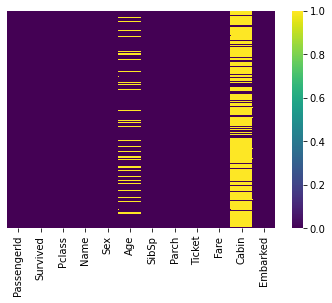

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

HANDLING THE MISSING VALUES

In [12]:
#CABIN column has lot of missing values and we can't able to find its means so we simply drop that column
df = df.drop(columns = 'Cabin', axis = 1)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#for AGE column replace all the missing values with the mean of that column
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [20]:
#replacing the EMBARK column with the mode of that column because it is categorical values
print(df['Embarked'].mode())

0    S
dtype: object


In [21]:
print(df['Embarked'].mode()[0])

S


In [22]:
#replace with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# DATA ANALYSIS

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#lets see how many people are survived or not
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

DATA VISUALIZATION

In [28]:
sns.set()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

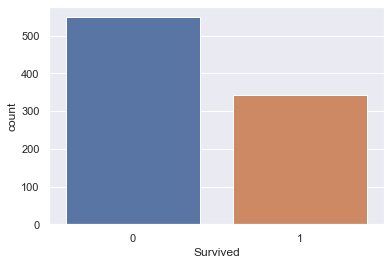

In [29]:
#making a count plot for survived column
sns.countplot('Survived', data = df)

In [30]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

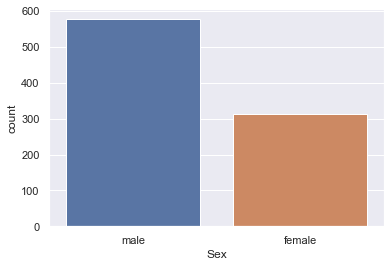

In [31]:
sns.countplot('Sex', data = df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

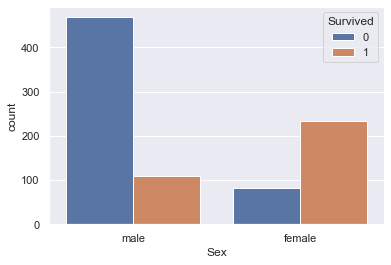

In [32]:
#WE KNOW WHEN THESE TYPE OF STUATION HAPPEN MAX SAVING PRIORITY GIVEN TO WOMEN AND CHILDREN AND RICH PEOPLE
#survived based on their gender
sns.countplot('Sex', hue = 'Survived', data = df)

In [34]:
#count number of peoples on class wise
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

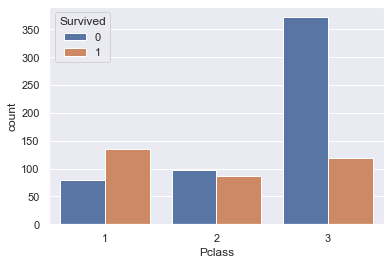

In [35]:
#check the survival ration based on class i.e rich vs poor people
sns.countplot('Pclass', hue='Survived', data=df)

In [38]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

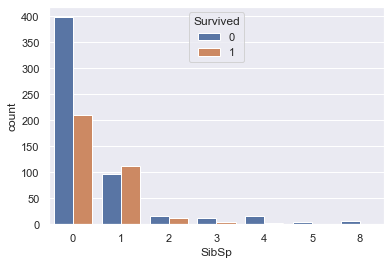

In [39]:
sns.countplot('SibSp', hue='Survived', data = df)

ENCODNG THE CATEGORICAL COLUMN WITH NUMERCIAL VALUES

In [40]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
#s->0
#c->1
#q->2
df.replace({'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [56]:
#REPLACING
#male->0
#female->1
df.replace({'Sex':{'male':0,'female':1}},inplace=True)

SEPRATING FEATURES AND TAEGET COLUMN

In [57]:
X = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = df['Survived']

In [58]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [59]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# TRAIN TEST SPLIT

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [62]:
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


MODEL TRAINING

In [63]:
model = LogisticRegression()

In [65]:
model.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# MODEL EVALUATION

In [68]:
#accuracy on traing data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [72]:
print("ACCURACY ON TRAING DATA IS : ",train_data_accuracy*100)

ACCURACY ON TRAING DATA IS :  80.75842696629213


In [73]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [74]:
print("ACCURACY ON TEST DATA IS : ",test_data_accuracy*100)

ACCURACY ON TEST DATA IS :  78.2122905027933


# BUILD A PREDICTIVE MODEL

In [77]:
# input_data = (3,0,22.0,1,0,7.2500,0)
input_data = (1,1,38.0,1,0,71.2833,1)

input_data_array = np.asarray(input_data)

input_data_reshape = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

if(prediction[0] == 1):
    print("PERSON IS SURVIVED")
else:
    print("PERSON IS NOT SURVIVED")

[1]
PERSON IS SURVIVED
